In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime, os
import re

In [64]:
df = pd.read_csv('244400404_effectifs-eleves-cleaned')
df.head()

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957


In [65]:
df['datetime']= df['Date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d"))
df['joursem']= df['Date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d").weekday())
df['isoweek']= df['Date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d").isocalendar().week)

In [66]:
df.head()

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm,datetime,joursem,isoweek
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870,2011-09-06,1,36
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698,2011-09-05,0,36
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427,2011-09-05,0,36
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169,2011-09-05,0,36
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957,2011-09-05,0,36


In [67]:
df_pool=df[['datetime','Réel','Prévision']].groupby('datetime').sum().reset_index()
df_pool.head()

,datetime,Réel,Prévision
0,2011-01-03,11127.0,11905.0
1,2011-01-04,11800.0,12172.0
2,2011-01-06,11723.0,12363.0
3,2011-01-07,12320.0,12423.0
4,2011-01-10,11281.0,11932.0


On vérifie que toutes les fêtes sont bien là.

In [68]:
df_pool.describe()

,Réel,Prévision
count,1520.000000,1520.000000
mean,13295.375000,13730.741447
std,2758.630743,2535.133303
min,20.000000,0.000000
25%,12462.500000,12967.750000
50%,13496.000000,14158.500000
75%,15163.000000,15236.500000
max,17074.000000,21123.000000


<AxesSubplot:ylabel='Frequency'>

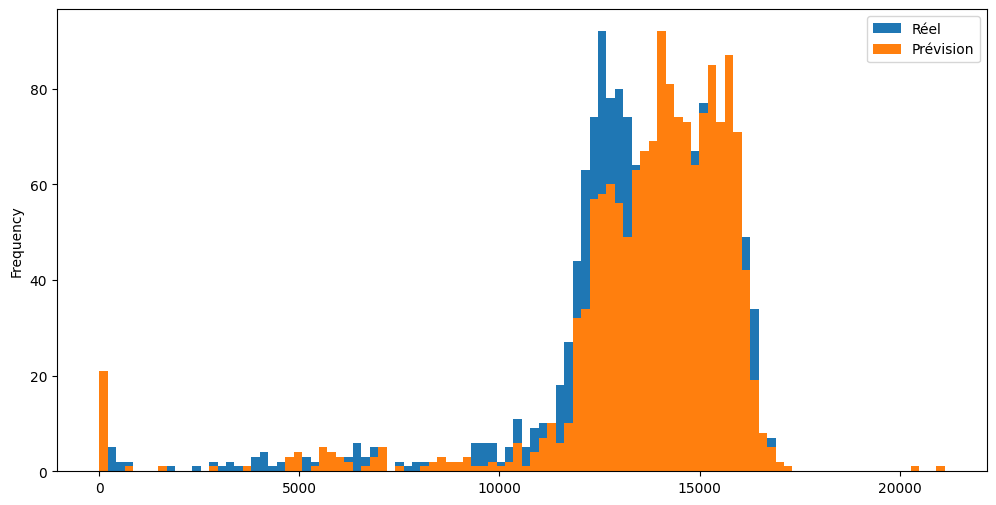

In [69]:
df_pool.plot.hist(bins=100, figsize=(12,6))

In [70]:
df_pool['joursem']= df_pool['datetime'].apply( lambda dt1 : dt1.weekday())
df_pool['isoweek']= df_pool['datetime'].apply( lambda dt1 : dt1.isocalendar().week )
df_pool.head()

,datetime,Réel,Prévision,joursem,isoweek
0,2011-01-03,11127.0,11905.0,0,1
1,2011-01-04,11800.0,12172.0,1,1
2,2011-01-06,11723.0,12363.0,3,1
3,2011-01-07,12320.0,12423.0,4,1
4,2011-01-10,11281.0,11932.0,0,2


On n'observe pas de valeurs excessivement hautes pour "Réel", ce qui montre que le nettoyage des données en amont a été efficace.

In [71]:
df_pool[df_pool['Réel']>18000]

,datetime,Réel,Prévision,joursem,isoweek


On a deux outliers pour les prévisions, on le constate mais on ne procèdera pas à un suivi.

In [72]:
df_pool[df_pool['Prévision']>18000]

,datetime,Réel,Prévision,joursem,isoweek
1005,2018-09-24,15327.0,20285.0,0,39
1499,2022-04-01,15273.0,21123.0,4,13


Sur 1500 valeurs on a 105 valeurs assez faibles

In [73]:
df_pool[df_pool['Réel']<10000].count()

datetime     105
Réel         105
Prévision    105
joursem      105
isoweek      105
dtype: int64

In [74]:
df_pool[df_pool['Réel']<10000].corr()

,Réel,Prévision,joursem,isoweek
Réel,1.000000,0.965504,-0.010793,0.060898
Prévision,0.965504,1.000000,0.026386,0.057118
joursem,-0.010793,0.026386,1.000000,-0.026366
isoweek,0.060898,0.057118,-0.026366,1.000000


La corrélation entre "Réel" et "Prévision" pour les valeurs faibles est trés bonne. Dans ce contexte on ne gagnera pas au change en utilisant "Prévision" comme variable de substitution.

Sur le graphe suivant on peut d'ailleurs observer la bonne corrélation des deux variables pour les valeurs hautes aussi bien que basses.

<AxesSubplot:>

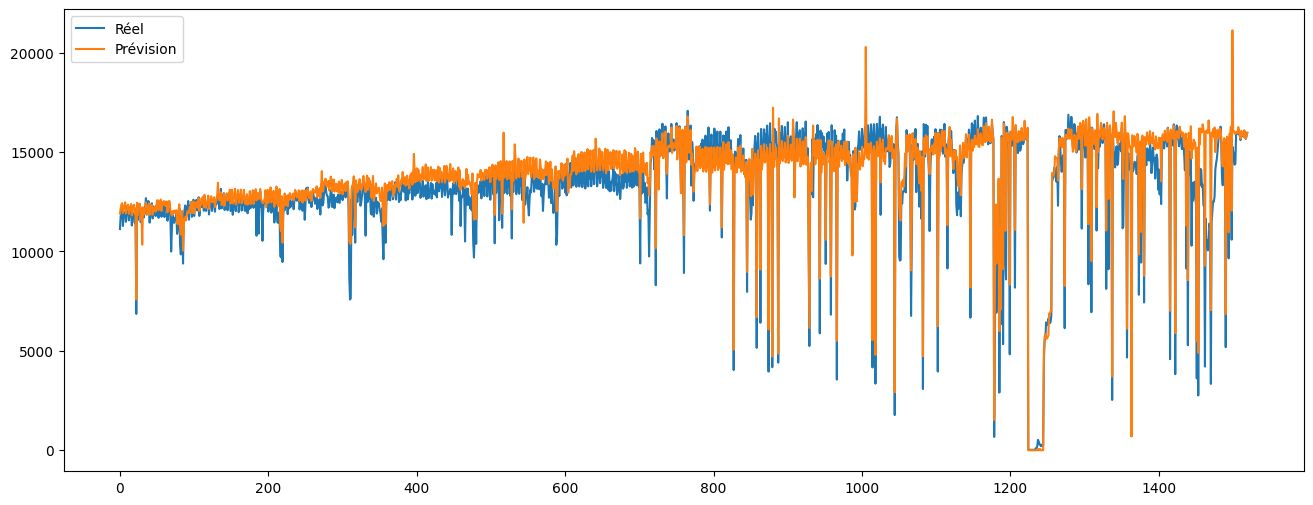

In [75]:
df_pool[['Réel','Prévision']].plot(figsize=(16,6))

In [76]:
# On veut savoir à quelle date correspond 700
df_pool[700:702]

,datetime,Réel,Prévision,joursem,isoweek
700,2016-05-31,13443.0,14083.0,1,22
701,2016-06-02,9397.0,11661.0,3,22


<AxesSubplot:>

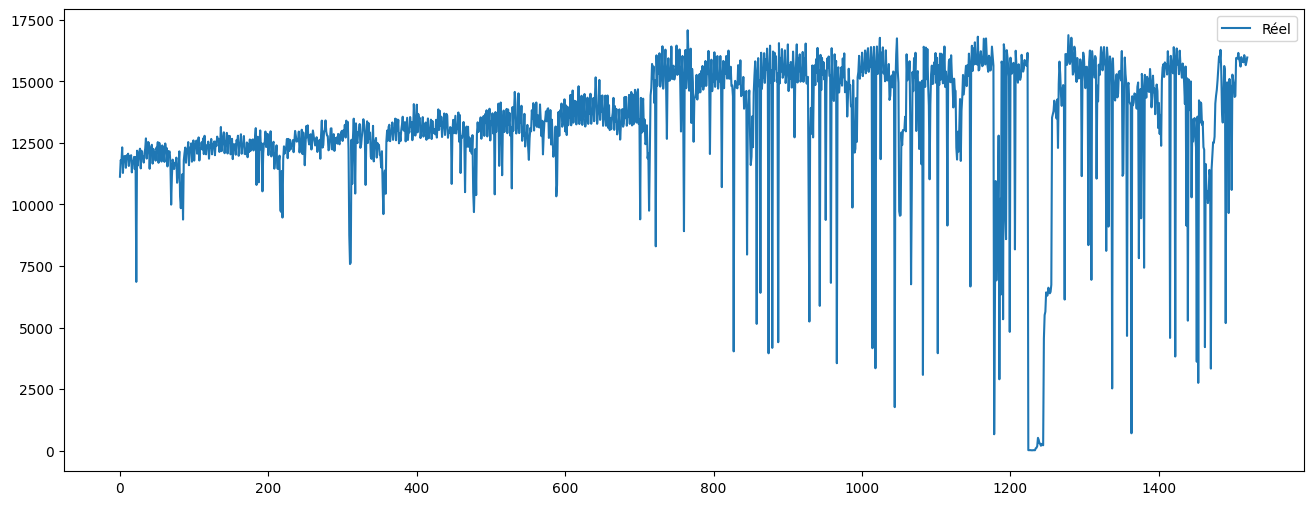

In [77]:
df_pool[['Réel']].plot(figsize=(16,6))

Si on regarde la variable "Réel" uniquement le constat est mitigé :  
- On observe clairement une saisonnalité (sans doute annuelle)  
- On observe également une tendance à la croissance  
- Par contre à partir de la rentrée 2016 on oberve plus de fluctuations et de valeurs apparemment aberrantes  

On observe une série continue de valeurs faibles entre 1210 et 1250, on peut soupçonner que cela est lié au covid en début d'année 2020.  
Vérifions cette hypothèse.

In [78]:
df_pool.keys()

Index(['datetime', 'Réel', 'Prévision', 'joursem', 'isoweek'], dtype='object')

<AxesSubplot:xlabel='datetime'>

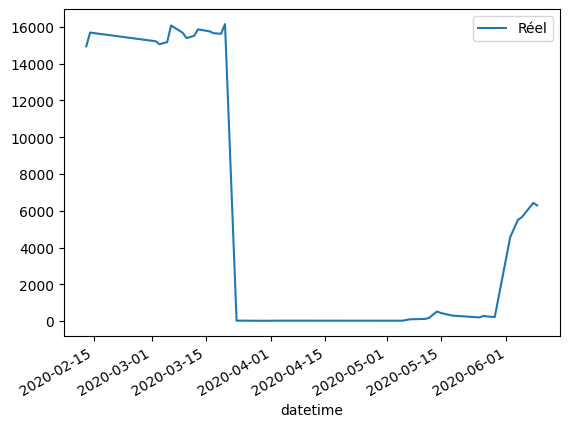

In [79]:
df_pool.iloc[1210:1250][['datetime','Réel']].plot(x='datetime',y='Réel')

Les dates semblent cohérentes avec la période des restrictions scolaires dues au covid en 2020.

Si on "zoome" sur la période concernée, on observe que les valeurs sont vraiment trés faibles.  
Il vaut sans doute mieux exclure les valeurs observées durant cette période.  

<AxesSubplot:xlabel='datetime'>

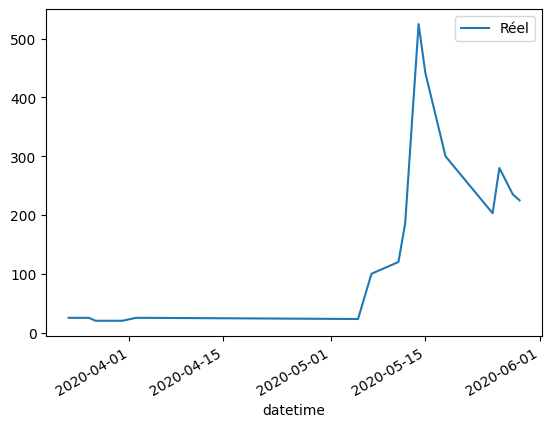

In [80]:
df_pool.iloc[1224:1245][['datetime','Réel']].plot(x='datetime',y='Réel')

In [81]:
df_pool.drop(df_pool.index[1224:1245], inplace=True)

<AxesSubplot:>

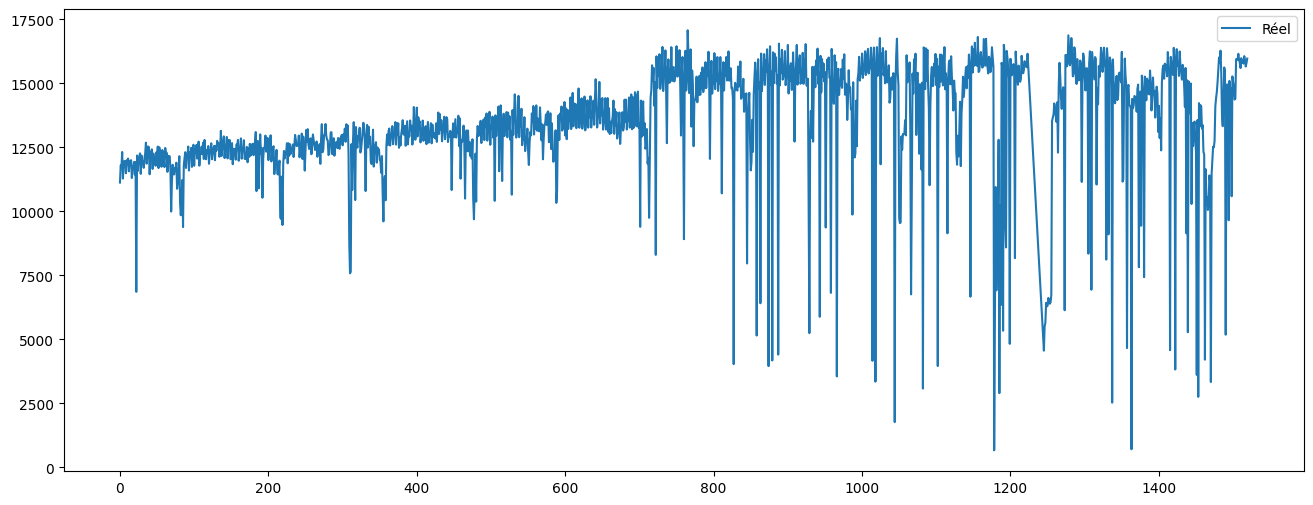

In [82]:
df_pool[['Réel']].plot(figsize=(16,6))

On observe aussi la présence d'une série de valeurs à mi-jauge que l'on peut exclure.

<AxesSubplot:xlabel='datetime'>

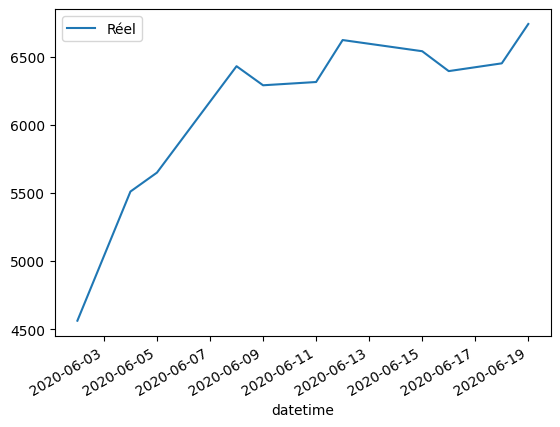

In [83]:
df_pool.iloc[1224:1235][['datetime','Réel']].plot(x='datetime',y='Réel')

In [84]:
df_pool.drop(df_pool.index[1224:1235], inplace=True)

<AxesSubplot:>

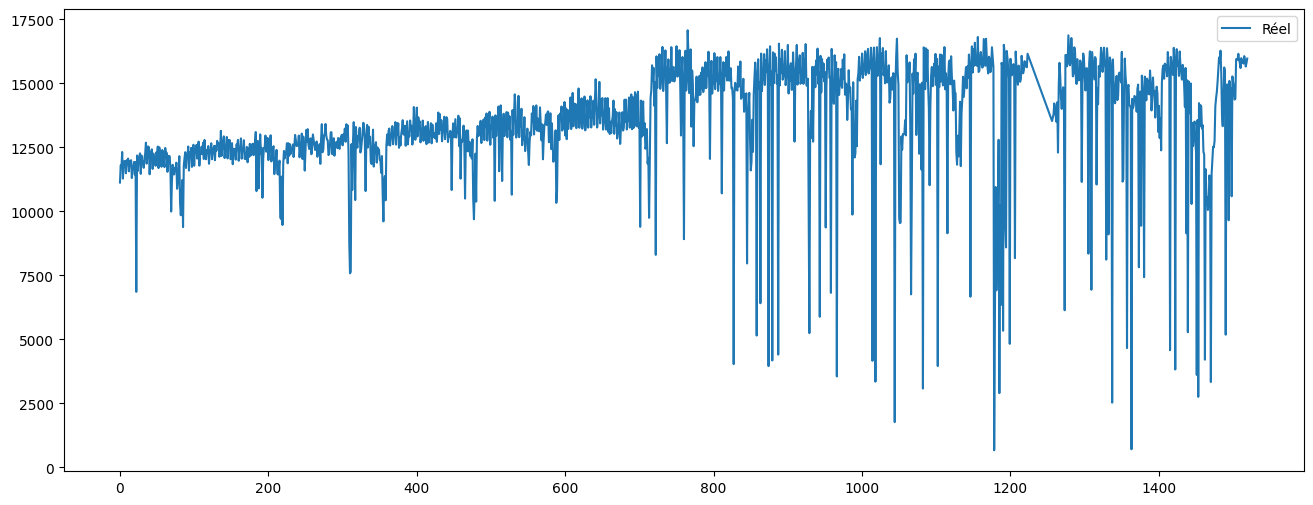

In [89]:
df_pool[['Réel']].plot(figsize=(16,6))

Voyons à quoi l'histogramme de la variable "Réel" ressemble maintenant.

<AxesSubplot:ylabel='Frequency'>

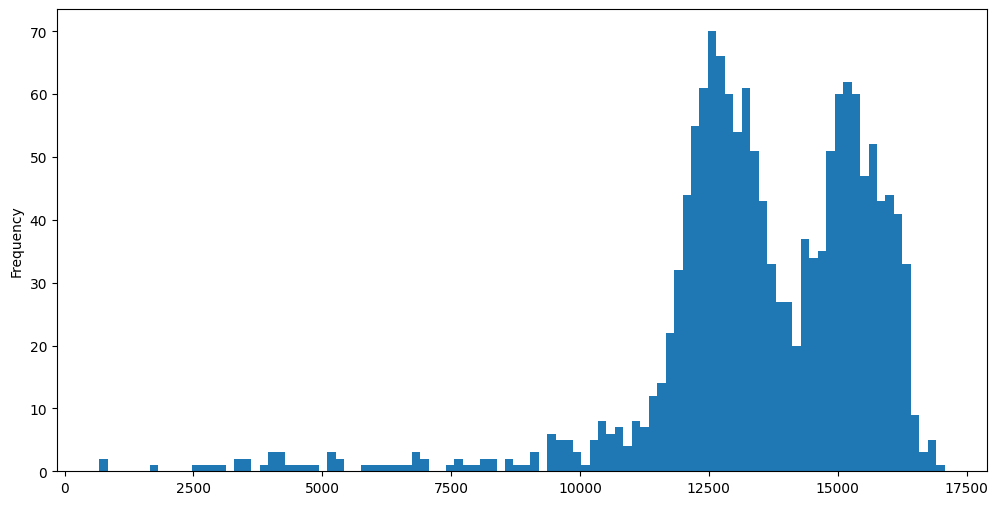

In [103]:
df_pool['Réel'].plot.hist(bins=100, figsize=(12,6))

En dessous du seuil de 9400 la distribution de la variable ressemble de très près à du bruit de fond aléatoire.

<AxesSubplot:ylabel='Frequency'>

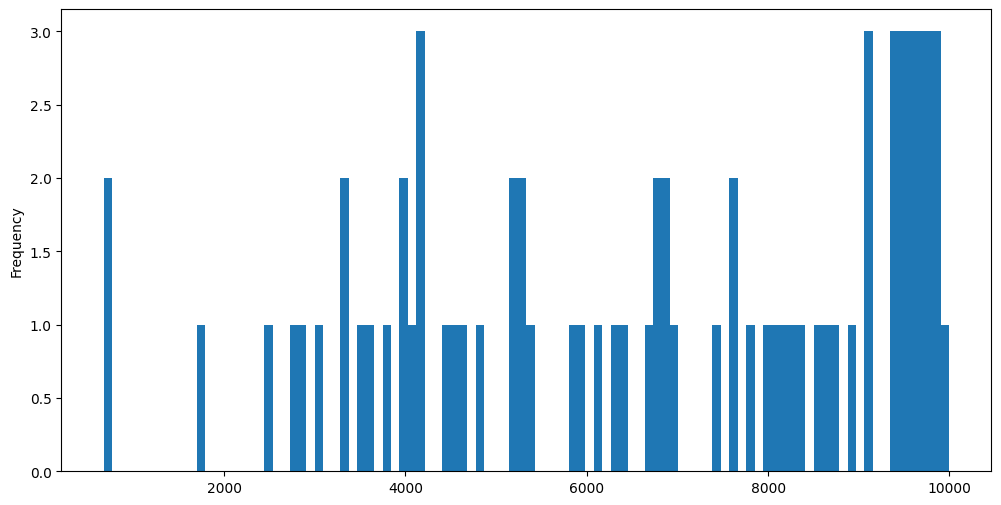

In [105]:
df_pool[df_pool['Réel']<10000]['Réel'].plot.hist(bins=100, figsize=(12,6))

<AxesSubplot:ylabel='Frequency'>

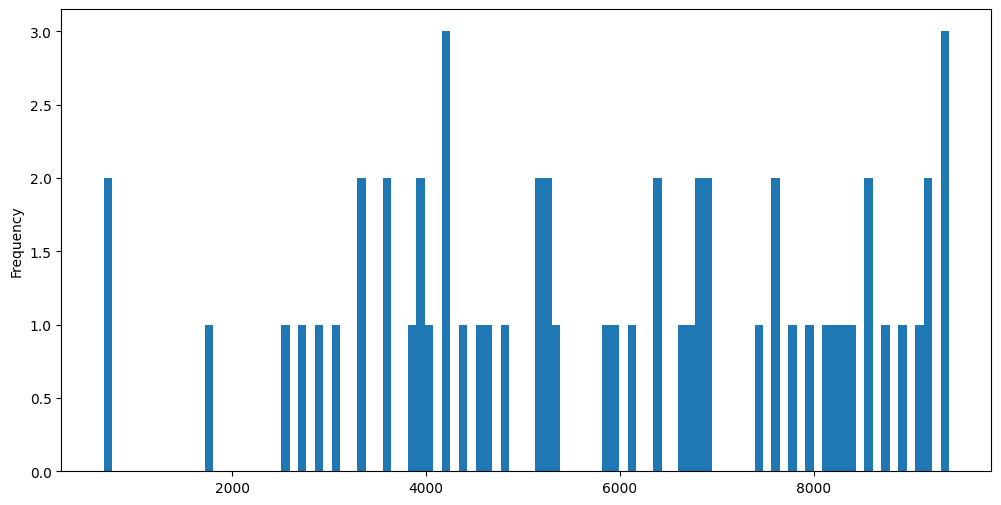

In [107]:
df_pool[df_pool['Réel']<9400]['Réel'].plot.hist(bins=100, figsize=(12,6))

On va représenter uniquement les valeurs supérieures à 9400 pour évaluer si cela régularise la courbe.

<AxesSubplot:>

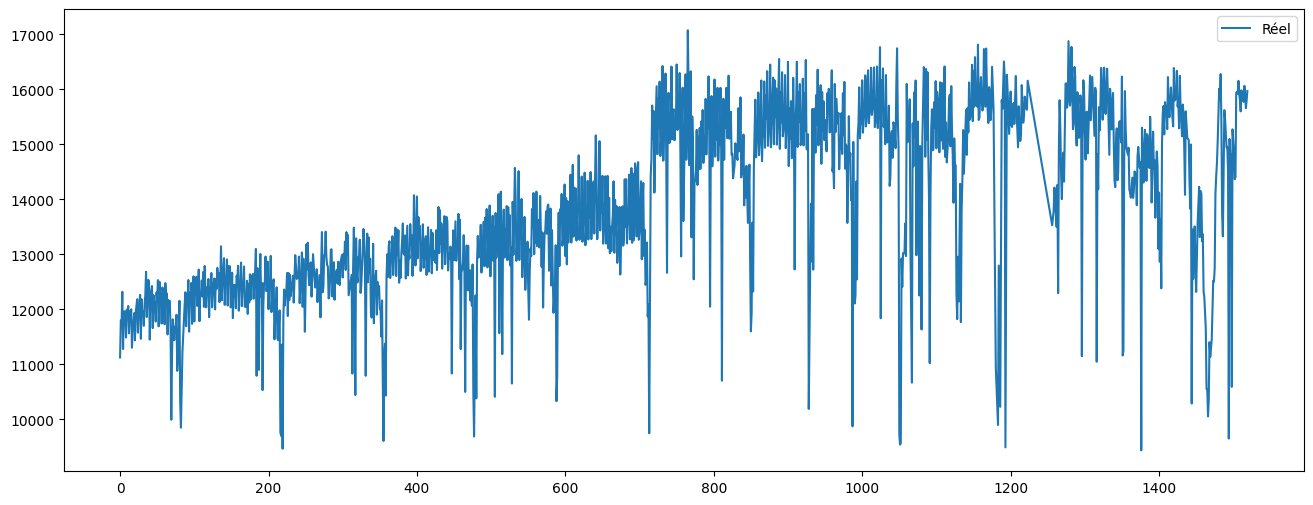

In [108]:
df_pool[df_pool['Réel']>=9400][['Réel']].plot(figsize=(16,6))

La réprésentation graphique suggère qu'on a un jeu de données plus régulier qui devrait être mieux adapté à l'entraînement d'un modèle.

In [109]:
df_pool_data = df_pool[df_pool['Réel']>=9400]

On va examiner les données comme des time series 

In [110]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [121]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [124]:
df_pool_data.set_index('datetime', inplace=True)

In [123]:
adfuller_test(df_pool_data['Réel'])

ADF Statistic : -3.820817492212641
p-value : 0.002701363753565605
Lags Used : 11
Number of Observations Used : 1419
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Stationary


Le test nous indique que la série est stationnaire, ce qui est déjà une information exploitable.  
Examinons les indicateurs de corrélation.

In [115]:
import statsmodels.tsa.arima_process as tsp
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

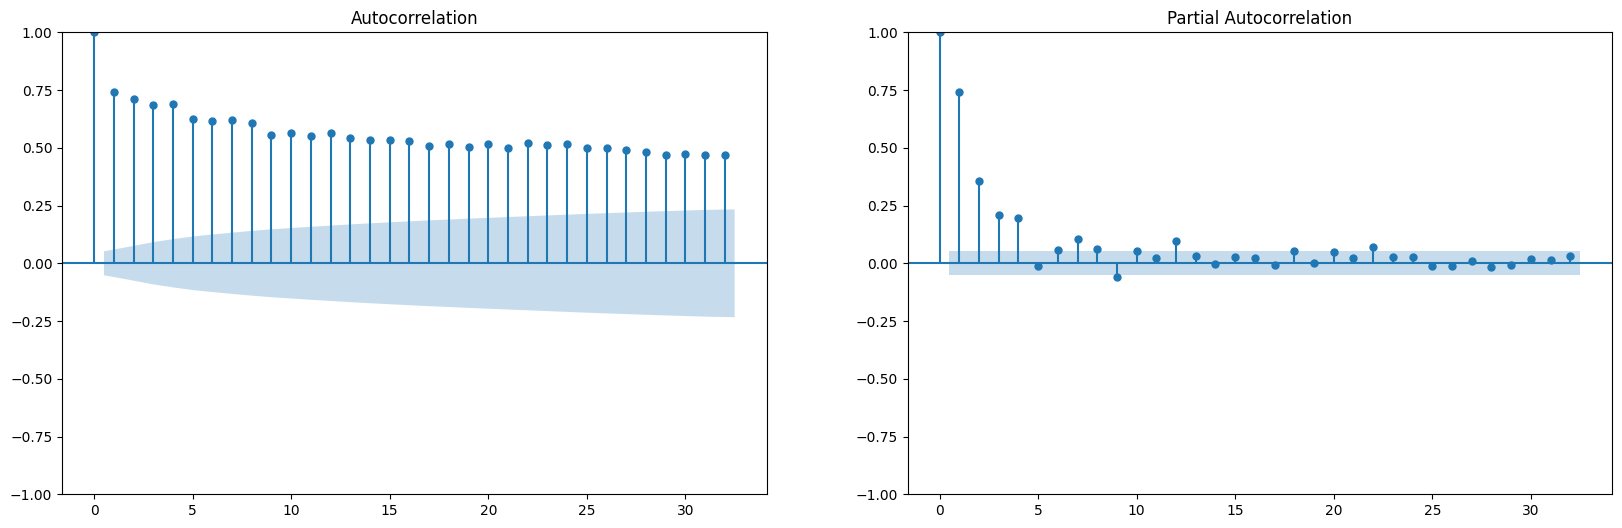

In [116]:
def plot_corr(dfcol):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
    plot_acf(dfcol, ax = ax1)
    plot_pacf(dfcol, ax = ax2, method='ywmle')
    plt.show()
    
plot_corr(df_pool_data['Réel'])

Deux informations sont ici exploitables:  
- On a une autocorrelation à long terme, les effectifs du mois précédent contiennent de l'information sur les effectifs actuels  
- On a une autocorrelation partielle des effectifs significative sur les 5 jours précédents le repas  

L'autocorrélation indique que l'on peut exploiter les valeurs 4-5 semaines à l'avance pour les prédictions
La corrélation partielle indique qu'on retrouve l'essentiel de l'information utile pour les prédiction dans les valeurs des 5 jours précédents.

In [118]:
from statsmodels.tsa.statespace.tools import diff

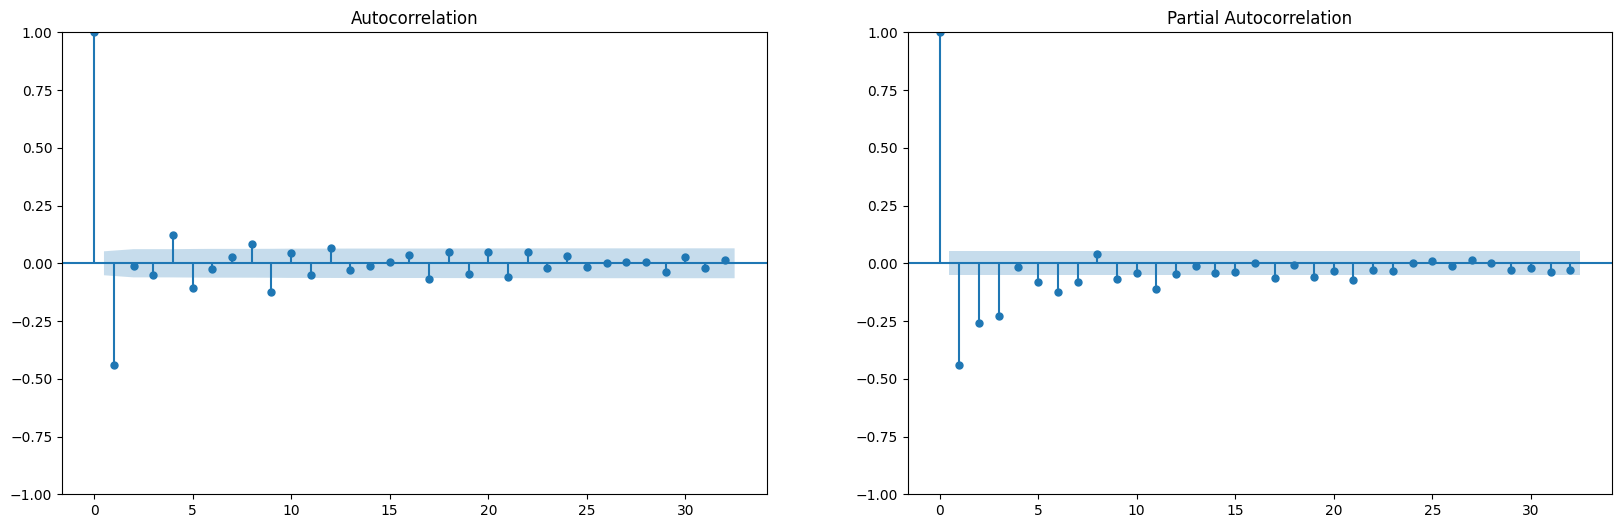

In [120]:
plot_corr(df_pool_data['Réel'].diff().dropna())

In [ ]:
adfuller_test(df_pool_data['Réel'].diff().dropna())

ADF Statistic : -12.97810309954549
p-value : 2.983072298482602e-24
Lags Used : 17
Number of Observations Used : 1396
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Stationary


C:\Users\Eric Bertrand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Eric Bertrand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Eric Bertrand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so 

                               SARIMAX Results                                
Dep. Variable:                   Réel   No. Observations:                 1415
Model:                 ARIMA(4, 1, 6)   Log Likelihood              -11507.541
Date:                Sun, 28 May 2023   AIC                          23037.081
Time:                        08:49:09   BIC                          23094.877
Sample:                             0   HQIC                         23058.676
                               - 1415                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1627      0.123     -1.324      0.185      -0.404       0.078
ar.L2         -0.0585      0.080     -0.727      0.467      -0.216       0.099
ar.L3          0.0597      0.079      0.754      0.4

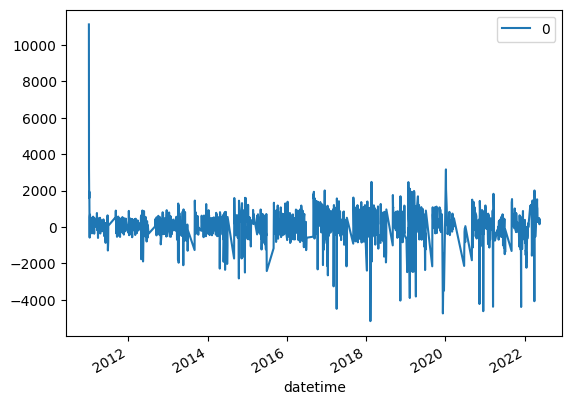

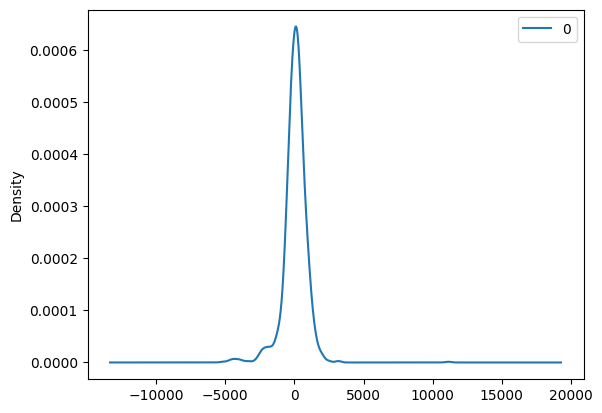

                  0
count   1415.000000
mean      53.739794
std      878.810938
min    -5176.077873
25%     -298.354952
50%       98.244477
75%      487.164462
max    11127.000000


In [ ]:
# fit an ARIMA model and plot residual errors
from statsmodels.tsa.arima.model import ARIMA


# fit model
model = ARIMA(df_pool_data['Réel'], order=(4,1,6))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())